# Energy Production vs Consumption: Global & Country-Level Analysis


# Introduction  

This project explores **global energy production and consumption trends** (Oil, Gas, Coal)  
from 1980 to 2021, using open-source data.  

The goal is to:  
- Understand global patterns in fossil fuel production vs. consumption.  
- Compare a specific country (**Ghana**) to global trends.  
- Provide insights and implications for **energy security and sustainability**.  

This analysis is part of my **CodeAlpha Data Analytics Internship** and is designed as a  
portfolio project showcasing **data storytelling and impactful visualizations**.



# Part A: Load and Clean Data  

Here, I start by loading the dataset and performing basic cleaning:  
- Standardize column names  
- Drop rows with missing values for simplicity  


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set beautiful style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'

# Load dataset
file_path = "C:\\Users\\PATRICK\\Documents\\Fuel production vs consumption.csv"
prod = pd.read_csv(file_path, encoding="cp1252")

# Clean column names
prod.columns = prod.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Drop missing values
prod = prod.dropna()

print("Shape after cleaning:", prod.shape)
prod.head()


Shape after cleaning: (7484, 15)


,year,entity,gas_productionm³,gas_consumptionm³,coal_productionton,coal_consumptionton,oil_productionm³,oil_consumptionm³,gas_production_per_capitam³,gas_consumption_per_capitam³,coal_production_per_capitaton,coal_consumption_per_capitaton,oil_production_per_capitam³,oil_consumption_per_capitam³,population
0,1980,Afghanistan,1.699000e+09,56640000.0,119000.0,119000.0,0.0,406500.0,127.2,4.241,0.00891,0.00891,0.0,0.03043,13360000.0
1,1981,Afghanistan,2.237000e+09,84960000.0,125000.0,125000.0,0.0,464600.0,169.9,6.450,0.00949,0.00949,0.0,0.03527,13170000.0
2,1982,Afghanistan,2.294000e+09,141600000.0,145000.0,145000.0,0.0,452900.0,178.1,10.990,0.01126,0.01126,0.0,0.03516,12880000.0
3,1983,Afghanistan,2.407000e+09,141600000.0,145000.0,145000.0,0.0,638800.0,192.0,11.290,0.01157,0.01157,0.0,0.05095,12540000.0
4,1984,Afghanistan,2.407000e+09,141600000.0,148000.0,148000.0,0.0,638800.0,197.2,11.600,0.01213,0.01213,0.0,0.05234,12200000.0



# Part B: Global Trends  

Here, I analyze how **global oil, gas, and coal production vs consumption**  
has changed over the years.  

Key questions:  
- Does consumption exceed production?  
- Which fuel shows the strongest gap between production and consumption?  


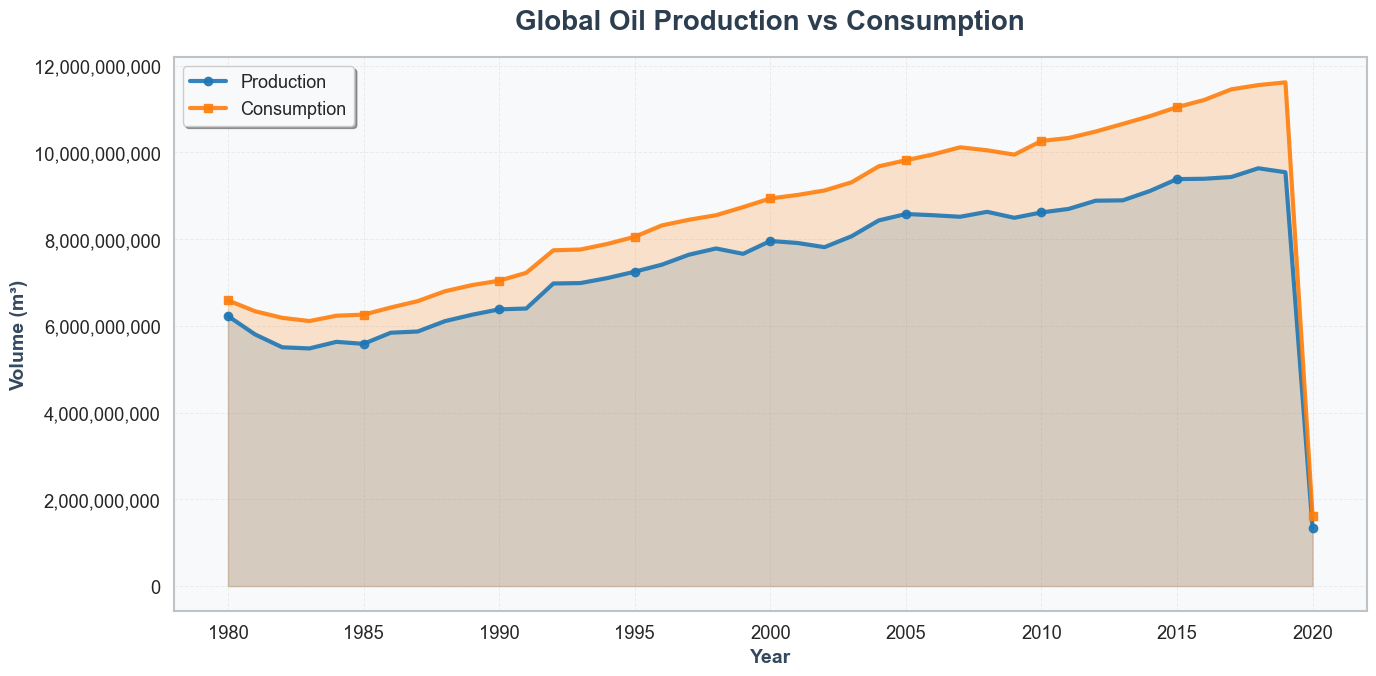

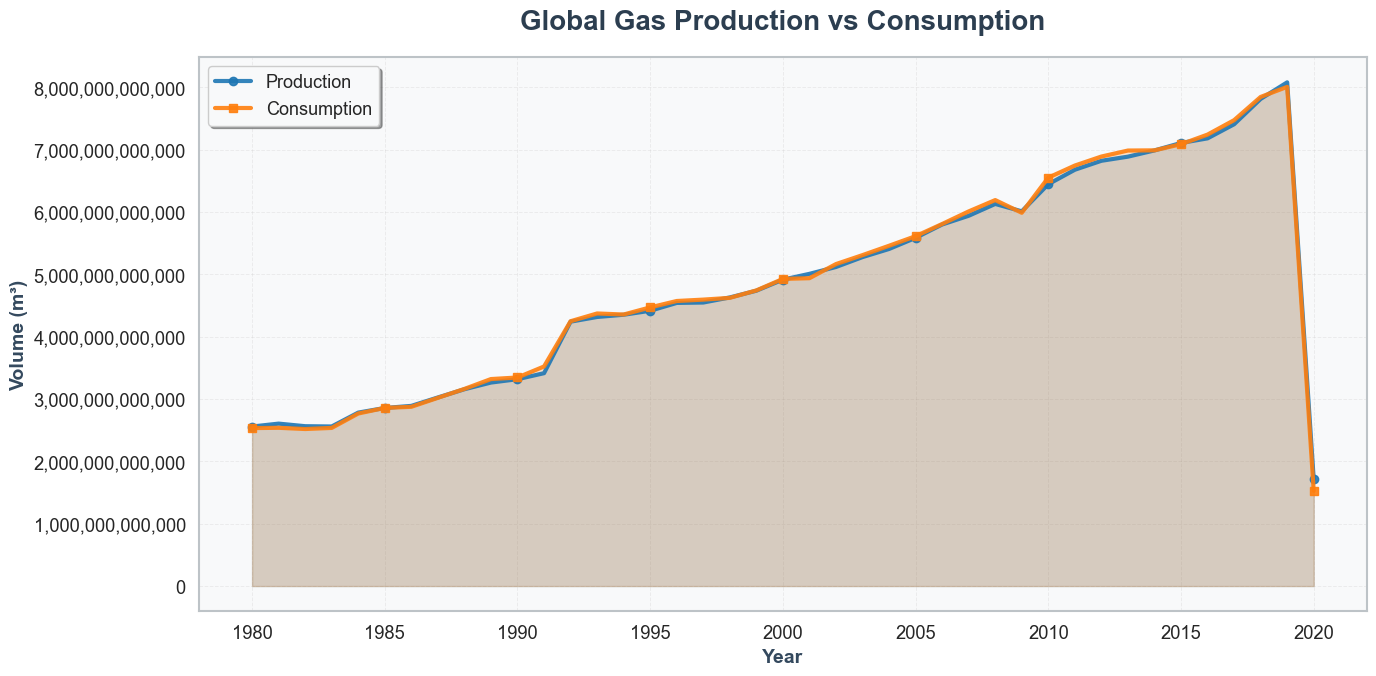

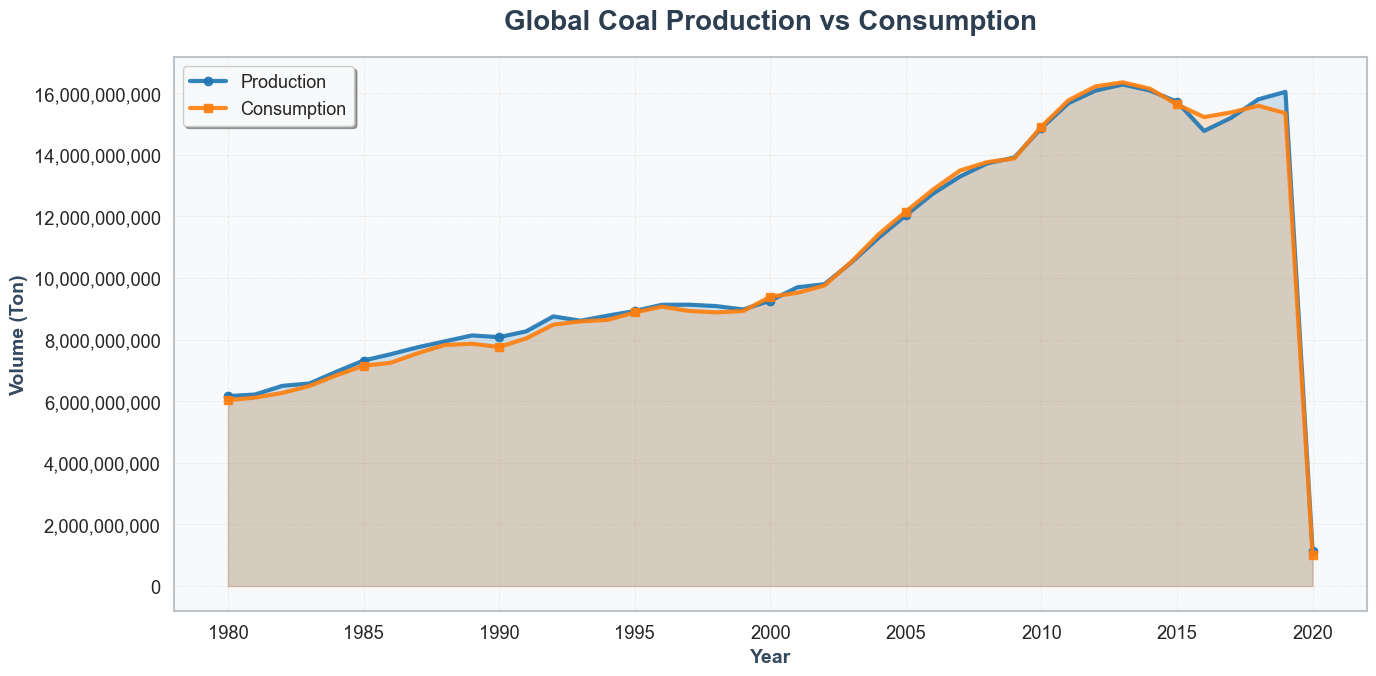

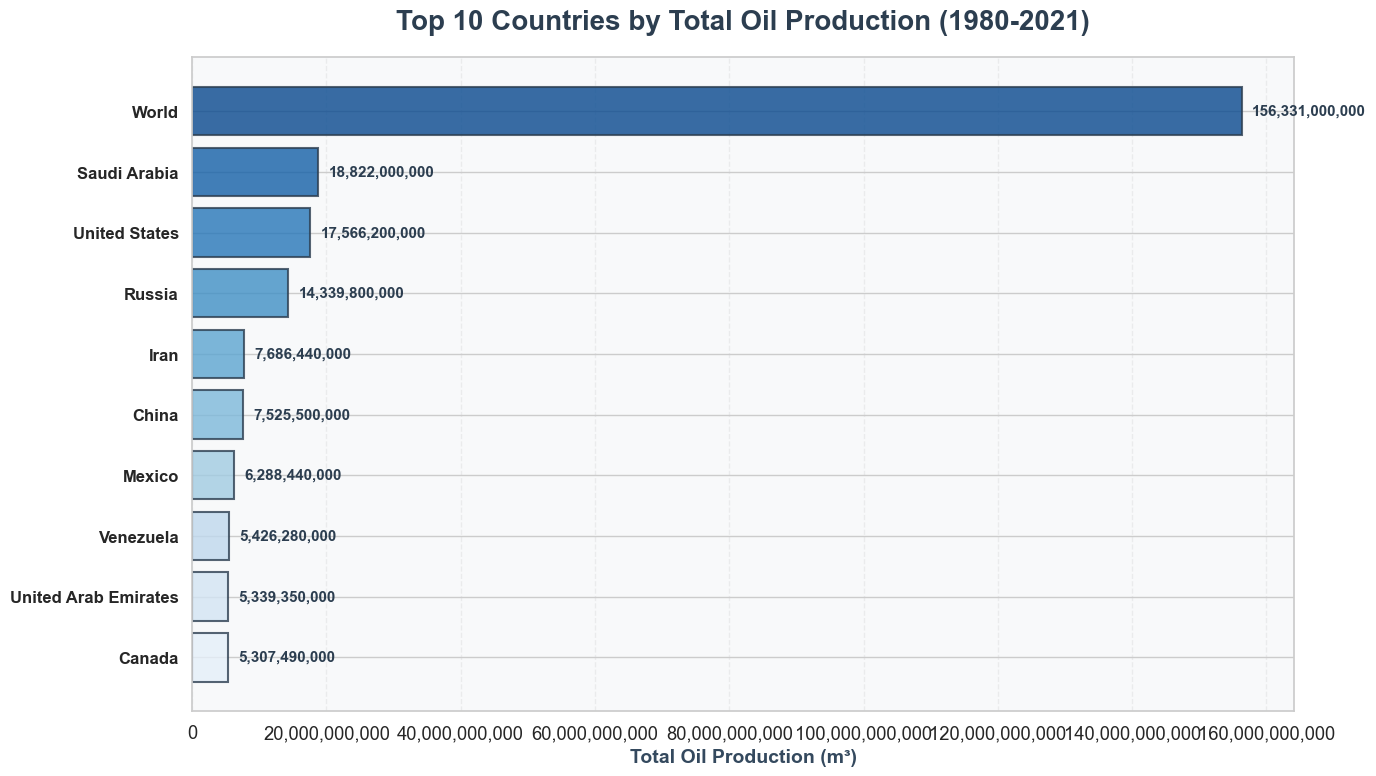

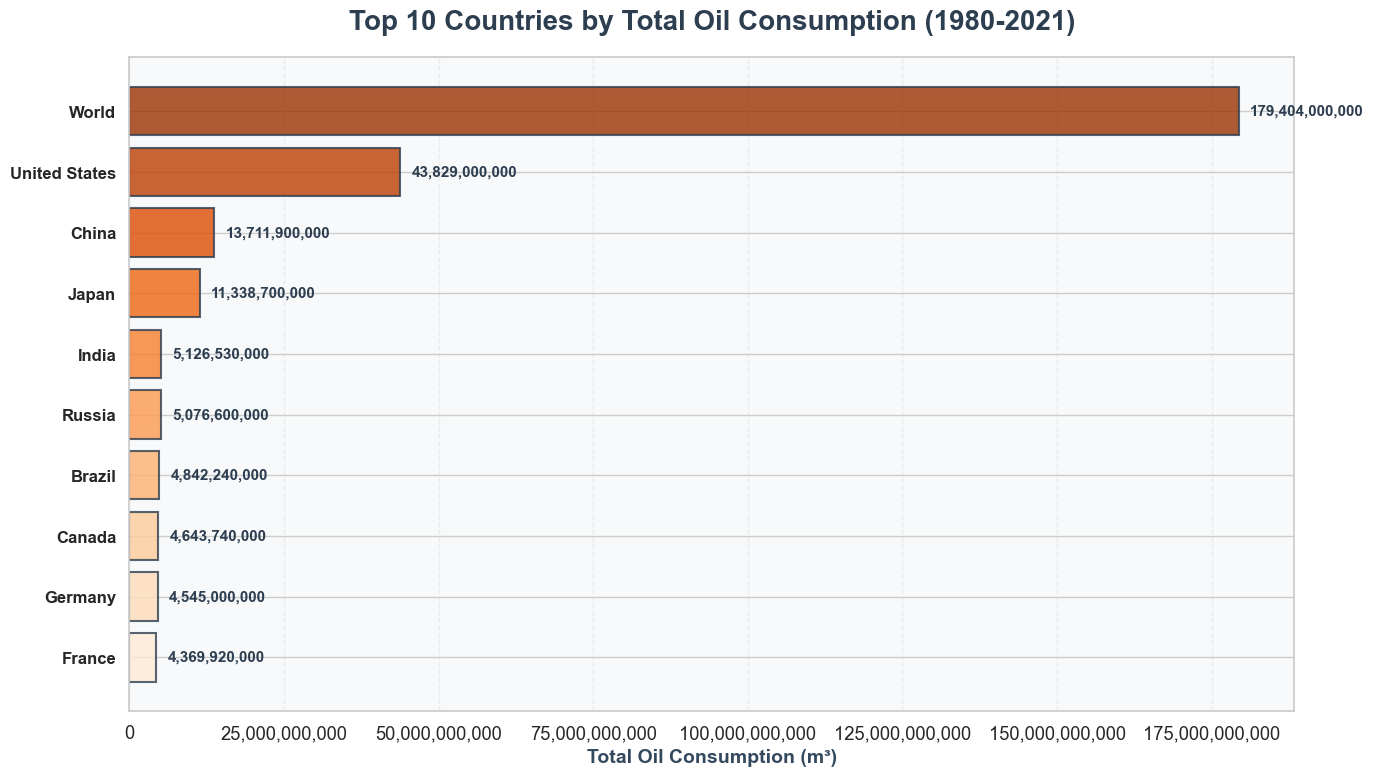

In [2]:

# Group data by year (global totals)
global_data = prod.groupby("year")[["oil_productionm³", "oil_consumptionm³",
                                   "gas_productionm³", "gas_consumptionm³",
                                   "coal_productionton", "coal_consumptionton"]].sum().reset_index()

# Beautiful plot function
def plot_global_trends(df, prod_col, cons_col, title, ylabel):
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Create gradient effect with fill between
    ax.plot(df["year"], df[prod_col], label="Production", 
            linewidth=3, color='#1f77b4', marker='o', markersize=6, 
            markevery=5, alpha=0.9)
    ax.plot(df["year"], df[cons_col], label="Consumption", 
            linewidth=3, color='#ff7f0e', marker='s', markersize=6,
            markevery=5, alpha=0.9)
    
    # Fill area between lines
    ax.fill_between(df["year"], df[prod_col], alpha=0.2, color='#1f77b4')
    ax.fill_between(df["year"], df[cons_col], alpha=0.2, color='#ff7f0e')
    
    # Styling
    ax.set_title(title, fontsize=20, fontweight='bold', pad=20, color='#2c3e50')
    ax.set_xlabel("Year", fontsize=14, fontweight='bold', color='#34495e')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold', color='#34495e')
    ax.legend(loc='upper left', fontsize=13, frameon=True, shadow=True, fancybox=True)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    # Add subtle box around plot
    for spine in ax.spines.values():
        spine.set_edgecolor('#bdc3c7')
        spine.set_linewidth(1.5)
    
    plt.tight_layout()
    plt.show()

# Oil
plot_global_trends(global_data, "oil_productionm³", "oil_consumptionm³",
                   "Global Oil Production vs Consumption", "Volume (m³)")

# Gas
plot_global_trends(global_data, "gas_productionm³", "gas_consumptionm³",
                   "Global Gas Production vs Consumption", "Volume (m³)")

# Coal
plot_global_trends(global_data, "coal_productionton", "coal_consumptionton",
                   "Global Coal Production vs Consumption", "Volume (Ton)")


# Top 10 Oil Producers - Beautiful Bar Chart
top_producers = prod.groupby("entity")["oil_productionm³"].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(14, 8))

# Create color palette
colors = sns.color_palette("Blues_r", len(top_producers))
bars = ax.barh(range(len(top_producers)), top_producers.values, color=colors, 
               edgecolor='#2c3e50', linewidth=1.5)

# Add gradient effect to bars
for i, bar in enumerate(bars):
    bar.set_alpha(0.8)
    width = bar.get_width()
    ax.text(width + max(top_producers.values)*0.01, bar.get_y() + bar.get_height()/2, 
            f'{width:,.0f}', ha='left', va='center', fontsize=11, 
            fontweight='bold', color='#2c3e50')

ax.set_yticks(range(len(top_producers)))
ax.set_yticklabels(top_producers.index, fontsize=12, fontweight='bold')
ax.set_title("Top 10 Countries by Total Oil Production (1980-2021)", 
             fontsize=20, fontweight='bold', pad=20, color='#2c3e50')
ax.set_xlabel("Total Oil Production (m³)", fontsize=14, fontweight='bold', color='#34495e')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

plt.tight_layout()
plt.show()


# Top 10 Oil Consumers - Beautiful Bar Chart
top_consumers = prod.groupby("entity")["oil_consumptionm³"].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(14, 8))

# Create color palette
colors = sns.color_palette("Oranges_r", len(top_consumers))
bars = ax.barh(range(len(top_consumers)), top_consumers.values, color=colors, 
               edgecolor='#2c3e50', linewidth=1.5)

# Add gradient effect to bars
for i, bar in enumerate(bars):
    bar.set_alpha(0.8)
    width = bar.get_width()
    ax.text(width + max(top_consumers.values)*0.01, bar.get_y() + bar.get_height()/2, 
            f'{width:,.0f}', ha='left', va='center', fontsize=11, 
            fontweight='bold', color='#2c3e50')

ax.set_yticks(range(len(top_consumers)))
ax.set_yticklabels(top_consumers.index, fontsize=12, fontweight='bold')
ax.set_title("Top 10 Countries by Total Oil Consumption (1980-2021)", 
             fontsize=20, fontweight='bold', pad=20, color='#2c3e50')
ax.set_xlabel("Total Oil Consumption (m³)", fontsize=14, fontweight='bold', color='#34495e')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Insight:** Since the 1980s, oil consumption has consistently  
outpaced production, highlighting global dependency challenges.  
Gas production and consumption have closely tracked each other, while coal shows fluctuating gaps.  



# Part C: Country-Level Analysis (Ghana)  

I focus on Ghana, my country, to compare local vs global trends.  


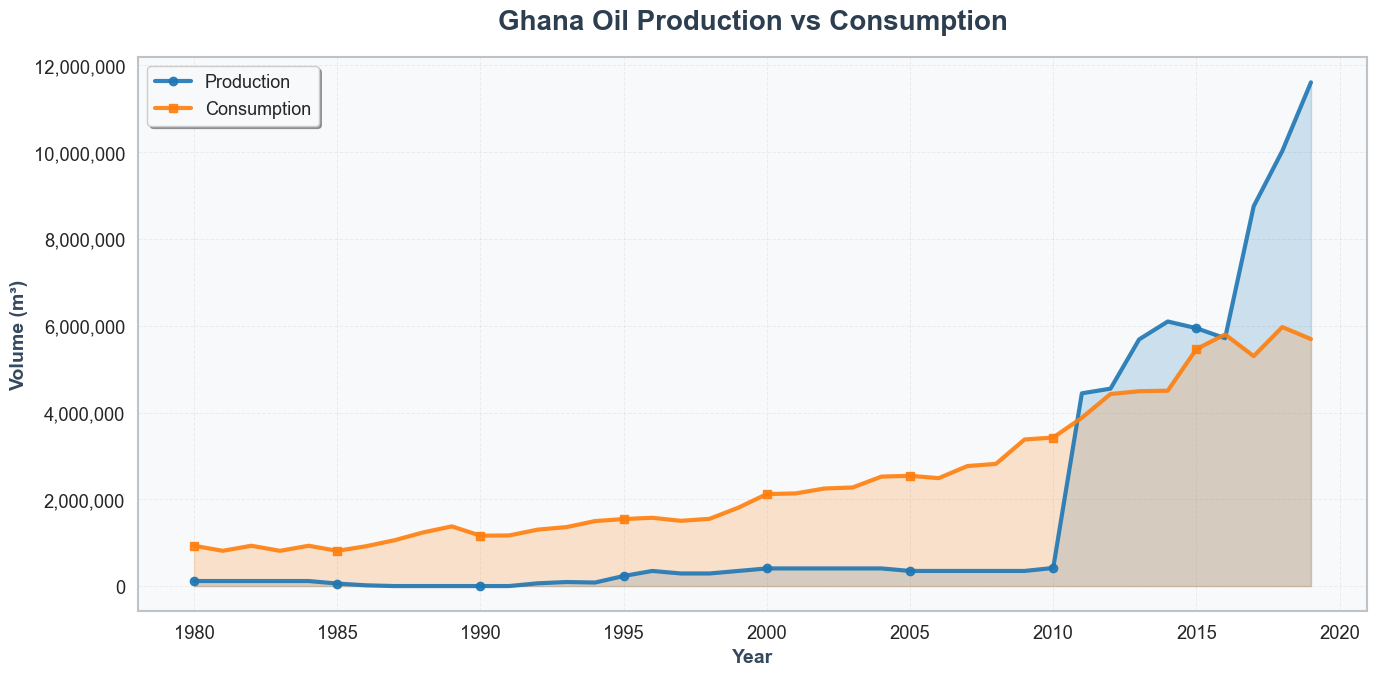

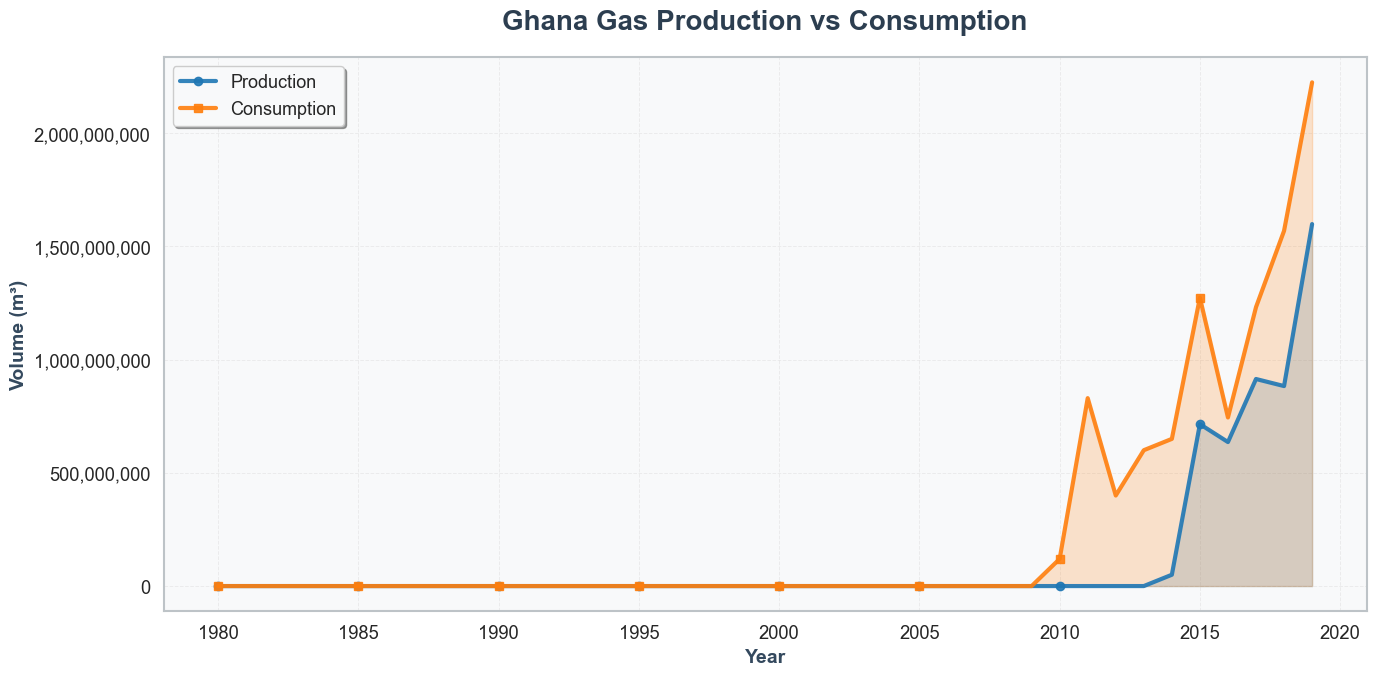

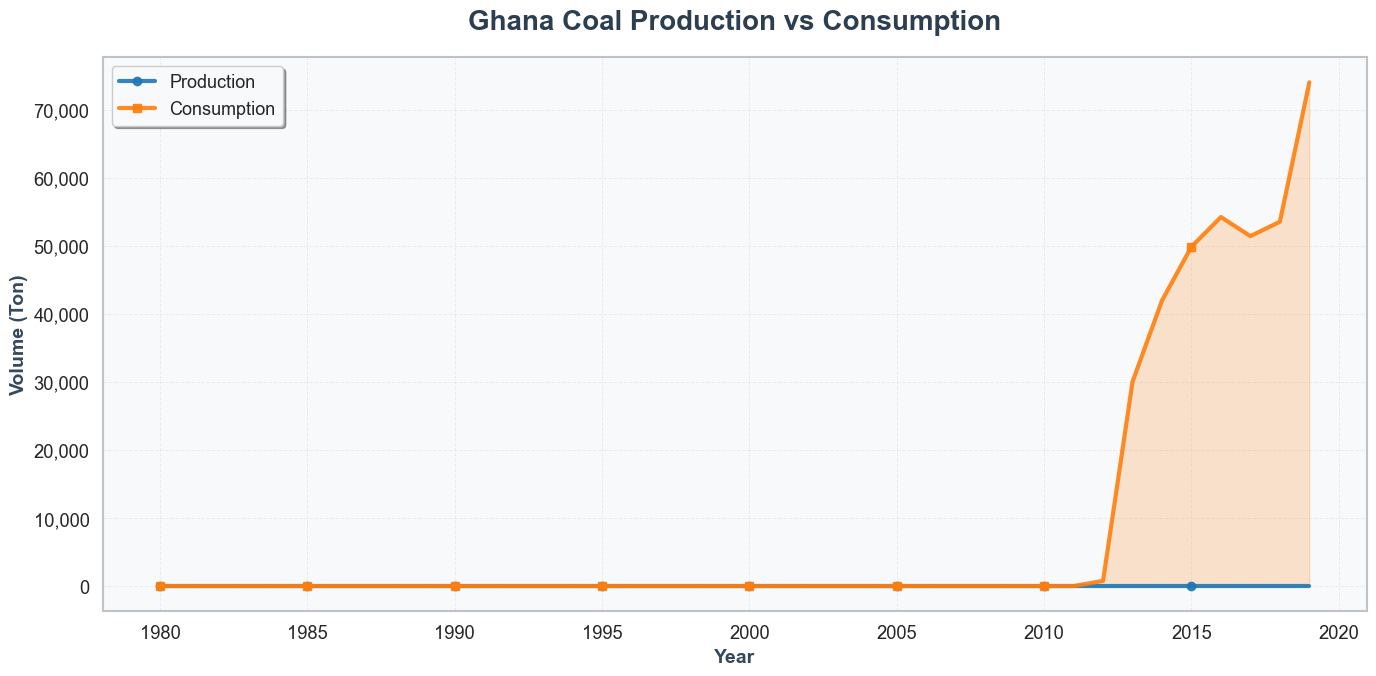

In [3]:

# Ghana Analysis
ghana = prod[prod["entity"].str.lower() == "ghana"]

# Oil
plot_global_trends(ghana, "oil_productionm³", "oil_consumptionm³",
                   "Ghana Oil Production vs Consumption", "Volume (m³)")

# Gas
plot_global_trends(ghana, "gas_productionm³", "gas_consumptionm³",
                   "Ghana Gas Production vs Consumption", "Volume (m³)")

# Coal
plot_global_trends(ghana, "coal_productionton", "coal_consumptionton",
                   "Ghana Coal Production vs Consumption", "Volume (Ton)")


**Observation:** Ghana’s oil and gas consumption is consistently higher than production, until nearly 2013, when production outpaced consumption for oil. This implies reliance on imports in the early years. Coal plays a very small role.  



# Part D: Key Insights 

### Oil  
- Global oil consumption exceeded production after 1980.  
- Developing countries face strong reliance on imports.  

### Gas  
- Gas production and consumption grew together post-1980.  
- Indicates rapid industrial demand, but vulnerable to supply shocks.  

### Coal  
- Coal production was higher than consumption in the 1980s–90s.  
- From 2000 onwards, both rose, but slowed after 2020.  

### Ghana Case  
- Ghana heavily relies on imports for oil and gas.  
- This dependence exposes the country to global price volatility.  

---
## Implications for Decision-Makers  
- Diversify energy sources to accelerate renewable investments.  
- Improve energy efficiency policies to reduce demand.  
- Strengthen local production capacity where possible.  



# Conclusion  

This analysis highlights a **global imbalance between fossil fuel  
production and consumption**.  

Countries like Ghana are particularly vulnerable to **energy security risks**  
due to high import reliance.  

Transitioning to **renewable energy** is a key solution for long-term  
sustainability, independence, and climate goals.  
